In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from operator import attrgetter
import json
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

%matplotlib inline

In [2]:
df = pd.read_csv('1. merge.csv')

In [3]:
# Check Order Status
df.order_status.value_counts()

order_status
delivered    3665
Name: count, dtype: int64

In [4]:
# Order status delivery
df = df[~(df.order_status == 'canceled')]

In [5]:
# Convert Data type
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])

In [6]:
# Assuming 'payment_value' is numeric, if not, convert it to numeric
df['payment_value'] = pd.to_numeric(df['payment_value'], errors='coerce')

# Group by month and aggregate sum of 'payment_value' and count of unique users
monthly_data = df.groupby(df['order_approved_at'].dt.to_period('M')).agg(
    monthly_sales=('payment_value', 'sum'),
    monthly_user=('customer_unique_id', 'nunique')
)

# Convert pandas.Period to string
monthly_data.index = monthly_data.index.strftime('%Y-%m')

# Serialize to JSON
monthly_data_json = json.dumps(monthly_data.to_dict())

In [7]:
trace_sales = go.Scatter(x=monthly_data.index, y=monthly_data['monthly_sales'], mode='lines+markers', name='Monthly Sales')
trace_users = go.Scatter(x=monthly_data.index, y=monthly_data['monthly_user'], mode='lines+markers', name='Monthly Users', yaxis='y2')

# Creating subplots
fig = make_subplots(specs=[[{'secondary_y': True}]])

# Adding traces to the subplots
fig.add_trace(trace_sales)
fig.add_trace(trace_users)

# Updating layout for the plot
fig.update_layout(title='Monthly Sales and Users Time Series', xaxis=dict(title='Month'), yaxis=dict(title='Total Sales'))
fig.update_layout(yaxis2=dict(title='Total Users', overlaying='y', side='right'))

# Showing the plot
fig.show()

In [8]:
# Fokus kita dari Jan 2017 - Aug 2018
df = df[df['order_approved_at'] >= '2017-01-01']

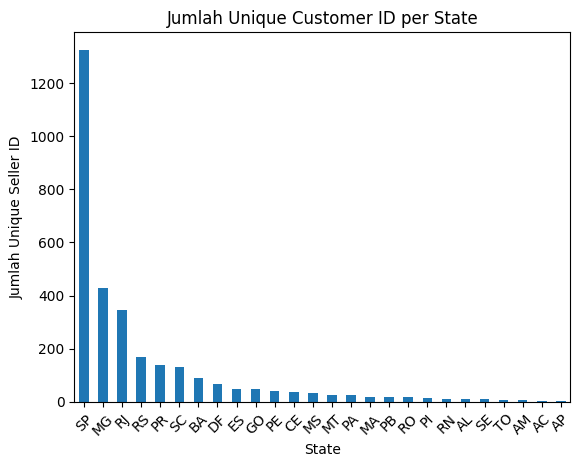

In [9]:
# Grupkan dataframe dan hitung jumlah unique seller_id berdasarkan seller_state
df.groupby('customer_state')['customer_unique_id'].nunique().sort_values(ascending=False).plot(kind='bar')

plt.title('Jumlah Unique Customer ID per State')
plt.xlabel('State')
plt.ylabel('Jumlah Unique Seller ID')
plt.xticks(rotation=45)
plt.show()

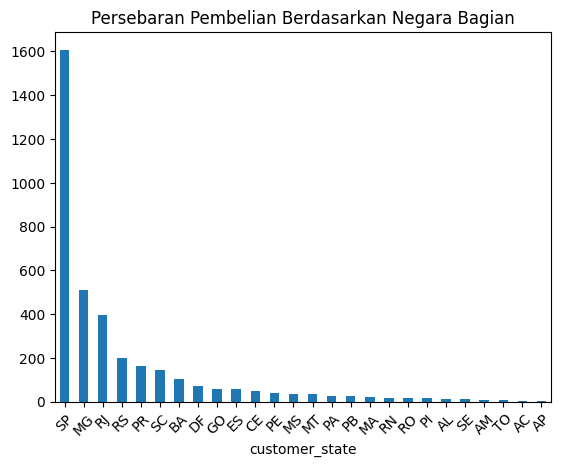

In [10]:
df['customer_state'].value_counts().sort_values(ascending=False).plot.bar(rot=45)
plt.title('Persebaran Pembelian Berdasarkan Negara Bagian')

plt.show()

In [11]:
# Membuat plot histogram untuk melihat distribusi variabel numerik
fig = px.histogram(df, x='customer_state', nbins=25, color='Category')
fig.update_layout(title='Customer Distribution', width=800, height=400)
fig.update_xaxes(tickangle=45)
fig.show()

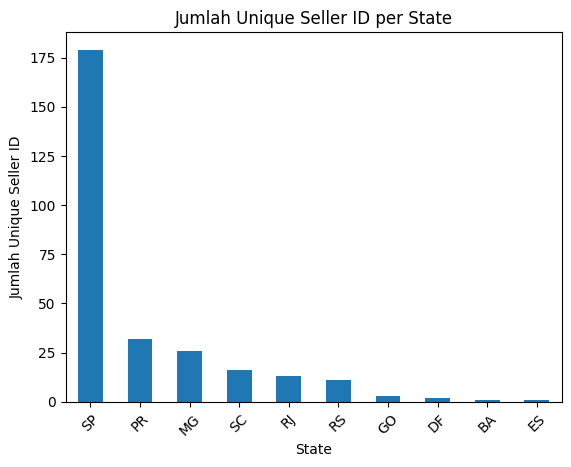

In [12]:
# Grupkan dataframe dan hitung jumlah unique seller_id berdasarkan seller_state
df.groupby('seller_state')['seller_id'].nunique().sort_values(ascending=False).plot(kind='bar')

plt.title('Jumlah Unique Seller ID per State')
plt.xlabel('State')
plt.ylabel('Jumlah Unique Seller ID')
plt.xticks(rotation=45)
plt.show()

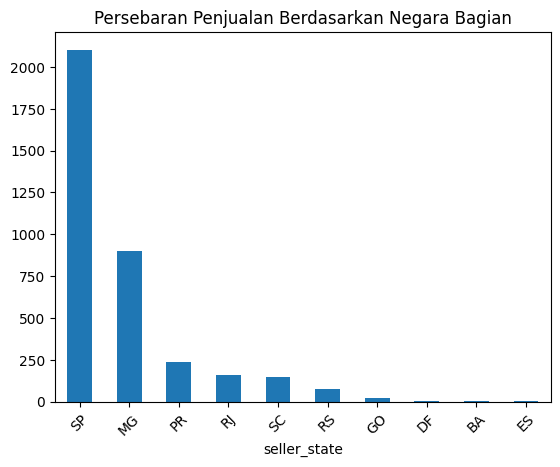

In [13]:
df['seller_state'].value_counts().sort_values(ascending=False).plot.bar(rot=45)
plt.title('Persebaran Penjualan Berdasarkan Negara Bagian')

plt.show()

In [14]:
# Membuat plot histogram untuk melihat distribusi variabel numerik
fig = px.histogram(df, x='seller_state', nbins=25, color='Category')
fig.update_layout(title='Seller Distribution', width=800, height=400)
fig.update_xaxes(tickangle=45)
fig.show()

In [15]:
df[df['customer_id'] == '94906d652f7d1c9e4c4af604ede7784b']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,translated_cat,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,subcategory,Category
86,94906d652f7d1c9e4c4af604ede7784b,544d0f13064dc42b8f6957cf43fa5cad,69918,rio branco,AC,9819957d2d80bb1cdb7774bb0b623d85,delivered,2017-08-16 01:09:56,2017-08-17 09:44:40,2017-08-18 15:43:55,...,market_place,1,credit_card,8,88.27,9271,santo andre,SP,market_place,Other


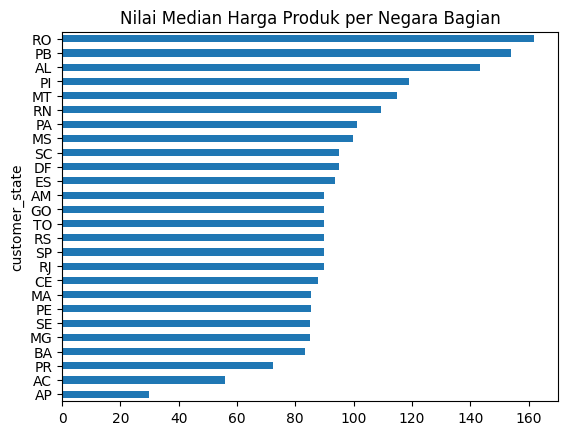

In [16]:
df.groupby('customer_state')['price'].median().sort_values(ascending=True).plot.barh()
plt.title('Nilai Median Harga Produk per Negara Bagian')
plt.show()

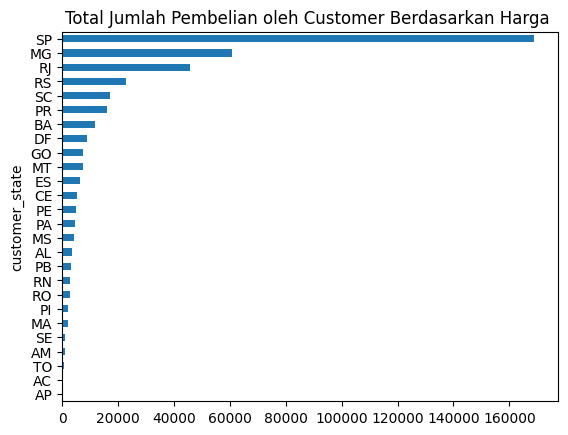

In [17]:
df.groupby('customer_state')['price'].sum().sort_values(ascending=True).plot.barh()
plt.title('Total Jumlah Pembelian oleh Customer Berdasarkan Harga ')

plt.show()

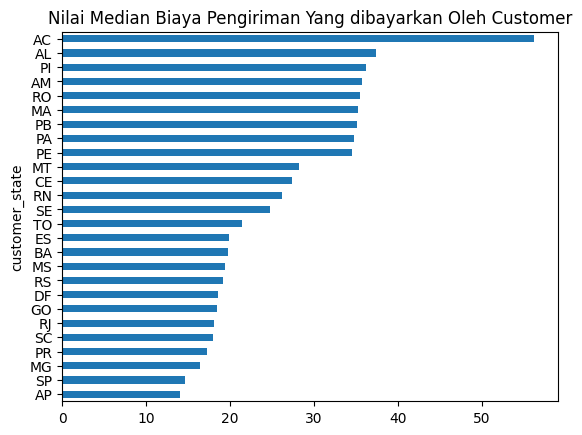

In [18]:
df.groupby('customer_state')['freight_value'].median().sort_values(ascending=True).plot.barh()
plt.title('Nilai Median Biaya Pengiriman Yang dibayarkan Oleh Customer')

plt.show()

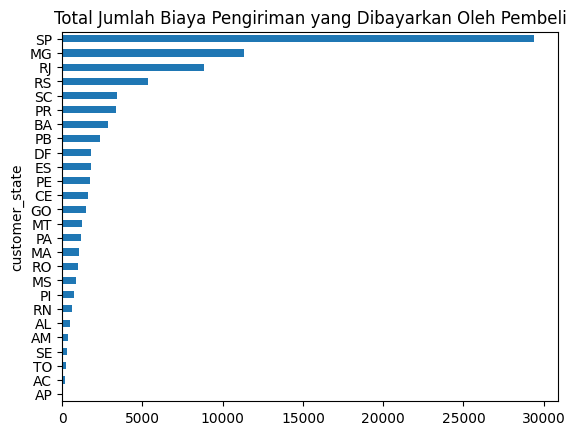

In [19]:
df.groupby('customer_state')['freight_value'].sum().sort_values(ascending=True).plot.barh()
plt.title('Total Jumlah Biaya Pengiriman yang Dibayarkan Oleh Pembeli')

plt.show()

In [20]:
df['payment_value'].describe()

count    3649.000000
mean      164.050713
std       227.633889
min         0.150000
25%        71.970000
50%       118.250000
75%       177.890000
max      3242.840000
Name: payment_value, dtype: float64

In [21]:
def boundaries(data, variables):
    Q1 = data[variables].quantile(.25)
    Q3 = data[variables].quantile(.75)
    IQR = Q3-Q1
    lower = Q1 - (1.5*IQR)
    ext_lower = Q1 - (3*IQR)
    upper = Q3 + (1.5*IQR)
    ext_upper = Q3 + (3*IQR)
    return Q1, Q3, IQR, lower, ext_lower, upper, ext_upper

In [22]:
Q1, Q3, IQR, lower, ext_lower, upper, ext_upper = boundaries(df, 'payment_value')
print('Q1 : ', Q1)
print('Q3 : ', Q3)
print('IQR : ', IQR)
print('Upper boundaries:', upper)
print('Extreme upper boundaries:', ext_upper)
print('Lower boundaries:', lower)
print('Extreme lower boundaries:', ext_lower)

Q1 :  71.97
Q3 :  177.89
IQR :  105.91999999999999
Upper boundaries: 336.77
Extreme upper boundaries: 495.65
Lower boundaries: -86.91
Extreme lower boundaries: -245.79


In [23]:
# Check Outlier
fig = px.box(df, y="payment_value")
fig.show()

In [24]:
# Check Anomali Data
df[df['payment_value'] > 5000][['customer_unique_id', 'order_id', 'order_approved_at', 'price', 'freight_value', 'payment_value']]

,customer_unique_id,order_id,order_approved_at,price,freight_value,payment_value


In [25]:
df[df['payment_value'] > 2500][['customer_unique_id', 'order_id', 'order_approved_at', 'price', 'freight_value', 'payment_value', 'Category']]

,customer_unique_id,order_id,order_approved_at,price,freight_value,payment_value,Category
1729,d8f1c3ed0de527caf0a7eceeb025b583,c28f3a01d4cfee461234c86a41f52e37,2017-03-18 17:56:04,2498.0,76.38,2574.38,Other
2444,adfa1cab2b2c8706db21bb13c0a1beb1,912343626f370ead5ef2e85a9d757e22,2018-06-01 19:31:26,529.9,64.69,3242.84,Other
2445,adfa1cab2b2c8706db21bb13c0a1beb1,912343626f370ead5ef2e85a9d757e22,2018-06-01 19:31:26,529.9,64.69,3242.84,Other
2446,adfa1cab2b2c8706db21bb13c0a1beb1,912343626f370ead5ef2e85a9d757e22,2018-06-01 19:31:26,529.9,64.69,3242.84,Other
2447,adfa1cab2b2c8706db21bb13c0a1beb1,912343626f370ead5ef2e85a9d757e22,2018-06-01 19:31:26,529.9,64.69,3242.84,Other
2448,adfa1cab2b2c8706db21bb13c0a1beb1,912343626f370ead5ef2e85a9d757e22,2018-06-01 19:31:26,399.9,32.34,3242.84,Other
2449,adfa1cab2b2c8706db21bb13c0a1beb1,912343626f370ead5ef2e85a9d757e22,2018-06-01 19:31:26,399.9,32.34,3242.84,Other
2510,fff5eb4918b2bf4b2da476788d42051c,cf4659487be50c0c317cff3564c4a840,2018-07-05 16:04:19,175.0,299.16,2844.96,Other
2511,fff5eb4918b2bf4b2da476788d42051c,cf4659487be50c0c317cff3564c4a840,2018-07-05 16:04:19,175.0,299.16,2844.96,Other
2512,fff5eb4918b2bf4b2da476788d42051c,cf4659487be50c0c317cff3564c4a840,2018-07-05 16:04:19,175.0,299.16,2844.96,Other


In [26]:
# Membuat plot scatter matrix untuk melihat korelasi antar variabel numerik

fig = px.scatter(df, x='price', y='payment_value', color='Category')
fig.update_layout(title='Scatter Plot', width=800, height=500)
fig.show()

In [27]:
df = df[df['payment_value'] == (df['price'] + df['freight_value'])]

In [28]:
fig = px.box(df, y="payment_value")
fig.show()

In [29]:
Q1, Q3, IQR, lower, ext_lower, upper, ext_upper = boundaries(df, 'payment_value')
print('Q1 : ', Q1)
print('Q3 : ', Q3)
print('IQR : ', IQR)
print('Upper boundaries:', upper)
print('Extreme upper boundaries:', ext_upper)
print('Lower boundaries:', lower)
print('Extreme lower boundaries:', ext_lower)

Q1 :  73.26
Q3 :  165.42249999999999
IQR :  92.16249999999998
Upper boundaries: 303.66625
Extreme upper boundaries: 441.90999999999997
Lower boundaries: -64.98374999999997
Extreme lower boundaries: -203.22749999999996


In [30]:
len(df[(df['payment_value'] > ext_upper)])

65

In [31]:
df = df[~(df['payment_value'] > ext_upper)]

In [32]:
# Convert Datetime
df['order_approved_at'] = pd.to_datetime(df['order_approved_at']).dt.strftime('%Y-%m-%d')
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date']).dt.strftime('%Y-%m-%d')

In [33]:
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

In [34]:
df['delivery_time_days']=df['order_delivered_customer_date']-df['order_approved_at']
df['delivery_time_days'] = df['delivery_time_days'].dt.days
df['delivery_time_days'].head()

0    14
1     4
2     3
3     9
4     8
Name: delivery_time_days, dtype: int32

In [35]:
df['delivery_time_days'].describe()

count    2053.000000
mean       10.891866
std         7.819354
min        -1.000000
25%         6.000000
50%         9.000000
75%        14.000000
max       102.000000
Name: delivery_time_days, dtype: float64

In [36]:
# Check Outlier
fig = px.box(df, y="delivery_time_days")
fig.show()

In [37]:
Q1, Q3, IQR, lower, ext_lower, upper, ext_upper = boundaries(df, 'delivery_time_days')
print('Q1 : ', Q1)
print('Q3 : ', Q3)
print('IQR : ', IQR)
print('Upper boundaries:', upper)
print('Extreme upper boundaries:', ext_upper)
print('Lower boundaries:', lower)
print('Extreme lower boundaries:', ext_lower)

Q1 :  6.0
Q3 :  14.0
IQR :  8.0
Upper boundaries: 26.0
Extreme upper boundaries: 38.0
Lower boundaries: -6.0
Extreme lower boundaries: -18.0


In [38]:
df[((df['delivery_time_days'] < 0) | (df['delivery_time_days'] > ext_upper))]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,subcategory,Category,delivery_time_days
181,469de6321bc3cc06274c61d9aebeb0bf,31f47e48e5a49c4ae1ccf5ea9e2a5e11,26087,nova iguacu,RJ,66bd5293331e02863f2054bf659ed2be,delivered,2018-03-08 19:46:03,2018-03-08,2018-03-13 18:18:35,...,1,credit_card,1,101.54,6162,osasco,SP,market_place,Other,40
185,489d6e5705b34ec43cbe7cc16344a45d,12c618501e009d459cc177de818798d0,28860,casimiro de abreu,RJ,0f7a031ff7235289c8ce7270cac7c4ec,delivered,2018-02-21 08:54:02,2018-02-23,2018-02-28 21:23:36,...,1,boleto,1,100.95,6162,osasco,SP,market_place,Other,47
188,d0c62a8fa044769109a16d626b097449,35fd57656b4dc352e7a3049732c88bdd,89257,jaragua do sul,SC,65109cdae10193f20ee3c0f717cb349a,delivered,2018-02-12 20:13:27,2018-02-12,2018-02-15 20:52:34,...,1,credit_card,9,147.06,6162,osasco,SP,market_place,Other,42
246,07516dbc8f5965451e2506f728581bdf,f4d8c17279e9dfc30da6f14ef8b67219,24310,niteroi,RJ,9f8594990f5778cbd90eefec74ecb41c,delivered,2018-03-06 13:54:24,2018-03-06,2018-03-07 20:41:45,...,1,voucher,1,30.23,8820,mogi das cruzes,SP,market_place,Other,41
492,fdcd4987132cf021f0594fb829ca52a1,95c0391399360c0bd40d5ab2ca8c664a,22743,rio de janeiro,RJ,d41eaefcbf24537ea6d79847d02a02f7,delivered,2018-03-11 12:44:32,2018-03-11,2018-03-13 15:59:48,...,1,credit_card,2,113.25,31842,belo horizonte,MG,pet_shop,Other,52
739,110f5c3e2c73a6e64c91c92fbc0d21a5,e9c985ab2f43caebdb3bbde01506b0c5,27920,macae,RJ,923dbd74822b55ab663759d1bb50823f,delivered,2018-03-02 10:05:48,2018-03-02,2018-03-02 19:08:14,...,1,credit_card,10,141.62,13419,piracicaba,SP,pet_shop,Other,47
848,a93aaf1f50fd874a8d2cf3413cc2a9f3,151dd9cf0af37b5bdd489ab4812679a9,78138,varzea grande,MT,ad2a607cb972296b63c687849e21dd34,delivered,2018-03-20 12:46:43,2018-03-20,2018-03-27 19:28:02,...,1,credit_card,2,162.90,12327,jacarei,SP,pet_shop,Other,45
1052,1d12f3eea210892c245c9be2bd17a93c,b1f7aa0f8737c9e24aa42df4a5b1f986,9820,sao bernardo do campo,SP,6d1832bd42dccbd91d1ce32da7f54492,delivered,2018-07-01 12:02:12,2018-07-05,2018-07-03 19:25:00,...,1,boleto,1,138.46,13840,mogi guacu,SP,pet_shop,Other,-1
1256,c3d665a278af5874f95836cde559223c,457ab5dfd477fe2ac53e051f07d4c0c8,81030,curitiba,PR,4d348f6d947bef596a6e5e0d3212e8aa,delivered,2017-12-16 15:43:37,2017-12-16,2017-12-19 20:32:13,...,1,credit_card,1,58.59,3916,sao paulo,SP,pet_shop,Other,42
1362,803c5200acf6cbfe01c1ab5ef98e2351,56d712095533382d8543d34592f00118,90810,porto alegre,RS,3bb8ecf664bfd847878cd39b191d5b79,delivered,2018-03-26 08:35:15,2018-03-26,2018-03-29 21:51:54,...,1,credit_card,6,320.39,3471,sao paulo,SP,pet_shop,Other,40


In [39]:
df[((df['delivery_time_days'] < 0) | (df['delivery_time_days'] > upper))]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,subcategory,Category,delivery_time_days
86,94906d652f7d1c9e4c4af604ede7784b,544d0f13064dc42b8f6957cf43fa5cad,69918,rio branco,AC,9819957d2d80bb1cdb7774bb0b623d85,delivered,2017-08-16 01:09:56,2017-08-17,2017-08-18 15:43:55,...,1,credit_card,8,88.27,9271,santo andre,SP,market_place,Other,33
103,daf9d3ac77b9b0540ad7bf5825a39c1b,b57308b5ffef78ead8fa2588aeebc2f3,62800,aracati,CE,4c1cb5347e5cb2d9787834ae859c60b6,delivered,2017-02-16 02:03:30,2017-02-17,2017-02-21 13:47:14,...,1,boleto,1,87.83,9271,santo andre,SP,market_place,Other,28
117,0c851ae2a8765037fce6c6482ce93c8b,9ebed8d67f69d67295c405cce49e6fa4,69089,manaus,AM,c4250307d08bb97eee63ea4bf7565329,delivered,2017-11-27 14:20:47,2017-11-28,2017-11-29 14:19:03,...,1,boleto,1,202.06,9271,santo andre,SP,market_place,Other,37
151,d7c13c32539612fcc615e44ee3d9ecb8,79256675b4a72bc5cbc2de56b496cb40,60824,fortaleza,CE,9ce6c58565a9f49c421d2c6e9f650041,delivered,2017-10-16 18:46:05,2017-10-18,2017-10-24 23:53:10,...,1,boleto,1,139.90,83830,fazenda rio grande,PR,market_place,Other,27
181,469de6321bc3cc06274c61d9aebeb0bf,31f47e48e5a49c4ae1ccf5ea9e2a5e11,26087,nova iguacu,RJ,66bd5293331e02863f2054bf659ed2be,delivered,2018-03-08 19:46:03,2018-03-08,2018-03-13 18:18:35,...,1,credit_card,1,101.54,6162,osasco,SP,market_place,Other,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576,325d0a903a3eb65f0b0c2bb61fd4a6ec,1e81587ab2633b7b134efc91983f01bb,58675,santo andre,PB,9a194607b0125b5c6c0e01a53843080f,delivered,2018-01-16 17:02:33,2018-01-16,2018-01-17 17:12:40,...,1,credit_card,2,90.90,3035,sao paulo,SP,luggage_accessories,Other,31
3579,f6243ddedb1bf96ae357422c43bb883b,7b05e0471103ce0ef346e87c357273fe,23595,rio de janeiro,RJ,0dba8cb0559eb37cc0217a28496b5f07,delivered,2018-01-09 22:50:43,2018-01-10,2018-01-11 17:43:29,...,1,boleto,1,72.85,3035,sao paulo,SP,luggage_accessories,Other,49
3595,785c6a8133a7ad4ddcc5b9cfdd03a2a3,11514ad7f9ebee009a1144f337b08adb,96408,bage,RS,e5b92893da73abb227f25730ffa69680,delivered,2018-01-24 23:23:42,2018-01-24,2018-01-25 16:29:00,...,1,credit_card,4,76.08,3035,sao paulo,SP,luggage_accessories,Other,29
3603,4ed298b95353f35d266831f8944d77a5,cc8652fa71314ac6af870726e9ebd4bd,57052,maceio,AL,d129a390b12dad8097fca575b31aba6c,delivered,2018-02-06 12:15:10,2018-02-06,2018-02-06 23:45:40,...,1,credit_card,6,198.14,9951,diadema,SP,luggage_accessories,Other,46


In [40]:
df = df[~((df['delivery_time_days'] < 0) | (df['delivery_time_days'] > ext_upper))]

In [41]:
# Membuat plot histogram untuk melihat distribusi variabel numerik
fig = px.histogram(df, x='price', nbins=25, color='Category')
fig.update_layout(title='Price Distribution', width=800, height=400)
fig.show()

In [42]:
fig = px.histogram(df, x='payment_value', nbins=25, color='Category')
fig.update_layout(title='Payment Value Distribution', width=800, height=400)
fig.show()

In [43]:
len(df[df['price'] > 500])

0

In [44]:
df[df['price'] > 500]['Category'].value_counts()

Series([], Name: count, dtype: int64)

In [45]:
# Convert Data type
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

#menambahkan order_day agar jumlah order bisa dikelompokan per hari
df['order_day'] = df['order_purchase_timestamp'].dt.day_name()
#menambah order_day_num untuk menunjukkan angka hari setiap pekan. berguna untuk mengurutkan
df['order_day_num'] = df['order_purchase_timestamp'].dt.day_of_week
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,subcategory,Category,delivery_time_days,order_day,order_day_num
0,68735df1b09b8a52d5db6320a17934ce,0e35b3a35d3f09b9079e2f91a01f2cab,3716,sao paulo,SP,857963f443c1183582fc6386fd62ddcf,delivered,2017-09-24 18:20:03,2017-09-24,2017-09-29 22:32:31,...,2,241.19,5138,sao paulo,SP,market_place,Other,14,Sunday,6
1,41110560ba94c2e86afc7a12ad56ad08,1d6cd35271e75ebf524d224021678911,98400,frederico westphalen,RS,91199340efe15554e4533e5ffe47a31b,delivered,2017-03-31 07:51:28,2017-03-31,2017-03-31 13:01:02,...,3,30.86,90230,porto alegre,RS,market_place,Other,4,Friday,4
2,a4ae42d510710bdfd23de09c1fce5410,0c4cd30defdfe37fc9d50089c553f2e5,7220,guarulhos,SP,3393e0117eefaf7abdee7c0ec9582632,delivered,2017-07-07 11:13:50,2017-07-07,2017-07-07 19:38:59,...,2,57.84,2310,sao paulo,SP,market_place,Other,3,Friday,4
3,4823c52e962bd334cf992817bcdff533,d7f36ed554c844d47a19567041894aa3,22270,rio de janeiro,RJ,469486849094bf1935cd99d96e117ded,delivered,2017-08-23 19:47:18,2017-08-23,2017-08-24 15:27:12,...,3,63.61,2310,sao paulo,SP,market_place,Other,9,Wednesday,2
4,7786e89e083495d8466993cd6b3fde4f,21d2d2a8120b8d9a6b5642ddd53d14fc,5015,sao paulo,SP,18f3d3d3d8f47205c56d03799039c61a,delivered,2018-02-07 16:36:46,2018-02-07,2018-02-08 16:33:00,...,1,140.22,89023,blumenau,SC,market_place,Other,8,Wednesday,2


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2022 entries, 0 to 3664
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    2022 non-null   object        
 1   customer_unique_id             2022 non-null   object        
 2   customer_zip_code_prefix       2022 non-null   int64         
 3   customer_city                  2022 non-null   object        
 4   customer_state                 2022 non-null   object        
 5   order_id                       2022 non-null   object        
 6   order_status                   2022 non-null   object        
 7   order_purchase_timestamp       2022 non-null   datetime64[ns]
 8   order_approved_at              2022 non-null   datetime64[ns]
 9   order_delivered_carrier_date   2022 non-null   object        
 10  order_delivered_customer_date  2022 non-null   datetime64[ns]
 11  order_estimated_delive

In [47]:
#menghitung jumlah order per hari
daily_total_order = df.groupby(['order_day','order_day_num'])['order_id'].nunique()

#Mengembalikan data ke dalam bentuk data frame kembali
daily_total_order = pd.DataFrame(daily_total_order)
daily_total_order.reset_index(inplace=True)

#membuat nama kolom
daily_total_order.columns = ['order_day','order_day_num','total_order']

#Mengurutkan hari secara ascending (dari kecil ke besar)
daily_total_order.sort_values('order_day_num', ascending=True, inplace=True)
daily_total_order

,order_day,order_day_num,total_order
1,Monday,0,305
5,Tuesday,1,308
6,Wednesday,2,339
4,Thursday,3,310
0,Friday,4,287
2,Saturday,5,203
3,Sunday,6,268


In [48]:
#membuat grafik
fig = go.Figure()
fig.add_trace(go.Bar(x=daily_total_order['order_day'], y=daily_total_order['total_order']))

fig.update_layout(title='Daily Order Number',
                  xaxis_title='Day',
                  yaxis_title='Total Order')

fig.show()

In [49]:
fig = px.pie(df, names='payment_type', title='Proportion of Payment Types')
fig.show()

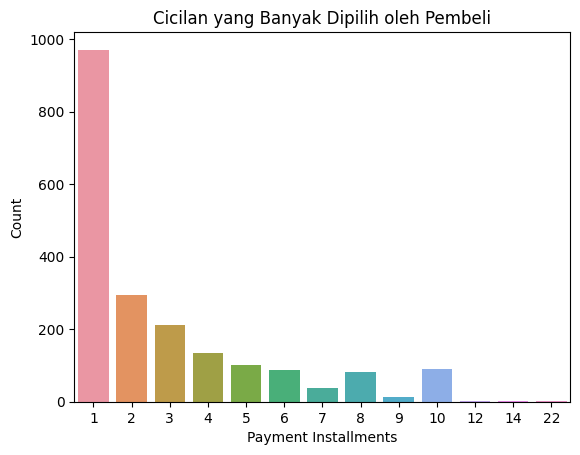

In [50]:
x = df['payment_installments'].value_counts().reset_index()
x.columns = ['installments', 'count']

# Creating a bar plot
sns.barplot(data=x, x='installments', y='count')
plt.title('Cicilan yang Banyak Dipilih oleh Pembeli')
plt.xlabel('Payment Installments')  # Add x-axis label if needed
plt.ylabel('Count')  # Add y-axis label if needed
plt.show()

In [51]:
data = df[['customer_unique_id' ,'order_approved_at']].copy()

In [52]:
data.rename(columns={'customer_unique_id': 'CustomerID', 'order_approved_at': 'InvoiceDate'}, inplace=True)

In [53]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [54]:
data['cohort_month'] = data.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

In [55]:
data['current_month'] = data['InvoiceDate'].dt.to_period('M')

In [56]:
data.head()

,CustomerID,InvoiceDate,cohort_month,current_month
0,0e35b3a35d3f09b9079e2f91a01f2cab,2017-09-24,2017-09,2017-09
1,1d6cd35271e75ebf524d224021678911,2017-03-31,2017-03,2017-03
2,0c4cd30defdfe37fc9d50089c553f2e5,2017-07-07,2017-07,2017-07
3,d7f36ed554c844d47a19567041894aa3,2017-08-23,2017-08,2017-08
4,21d2d2a8120b8d9a6b5642ddd53d14fc,2018-02-07,2018-02,2018-02


In [57]:
# total distinct number 
df_cohort = data.groupby(['cohort_month', 'current_month'], as_index=False)['CustomerID'].nunique().rename(columns={'CustomerID': 'n_customer'})
df_cohort.head()

,cohort_month,current_month,n_customer
0,2017-01,2017-01,14
1,2017-02,2017-02,50
2,2017-02,2017-03,1
3,2017-03,2017-03,61
4,2017-04,2017-04,76


In [58]:
# Period: selisih antara current month dengan cohort month
df_cohort['period']=(df_cohort['current_month']-df_cohort['cohort_month']).apply(attrgetter('n'))
# attrgetter untuk mengambil angka hasil pengurangan tanggal tanpa atribut monthend
df_cohort

,cohort_month,current_month,n_customer,period
0,2017-01,2017-01,14,0
1,2017-02,2017-02,50,0
2,2017-02,2017-03,1,1
3,2017-03,2017-03,61,0
4,2017-04,2017-04,76,0
5,2017-04,2017-05,1,1
6,2017-05,2017-05,93,0
7,2017-06,2017-06,91,0
8,2017-07,2017-07,104,0
9,2017-07,2017-08,1,1


In [59]:
pivot_cohort = df_cohort.pivot_table(index='cohort_month', columns='period', values='n_customer')
pivot_cohort

period,0,1,2,4,5,10
cohort_month,,,,,,
2017-01,14.0,NaN,NaN,NaN,NaN,NaN
2017-02,50.0,1.0,NaN,NaN,NaN,NaN
2017-03,61.0,NaN,NaN,NaN,NaN,NaN
2017-04,76.0,1.0,NaN,NaN,NaN,NaN
2017-05,93.0,NaN,NaN,NaN,NaN,NaN
2017-06,91.0,NaN,NaN,NaN,NaN,NaN
2017-07,104.0,1.0,1.0,NaN,NaN,NaN
2017-08,100.0,NaN,NaN,NaN,1.0,NaN
2017-09,78.0,NaN,NaN,NaN,NaN,1.0


In [60]:
pivot_cohort = pivot_cohort.divide(pivot_cohort[0], axis=0)

In [61]:
pivot_cohort

period,0,1,2,4,5,10
cohort_month,,,,,,
2017-01,1.0,NaN,NaN,NaN,NaN,NaN
2017-02,1.0,0.020000,NaN,NaN,NaN,NaN
2017-03,1.0,NaN,NaN,NaN,NaN,NaN
2017-04,1.0,0.013158,NaN,NaN,NaN,NaN
2017-05,1.0,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.009615,0.009615,NaN,NaN,NaN
2017-08,1.0,NaN,NaN,NaN,0.01,NaN
2017-09,1.0,NaN,NaN,NaN,NaN,0.012821


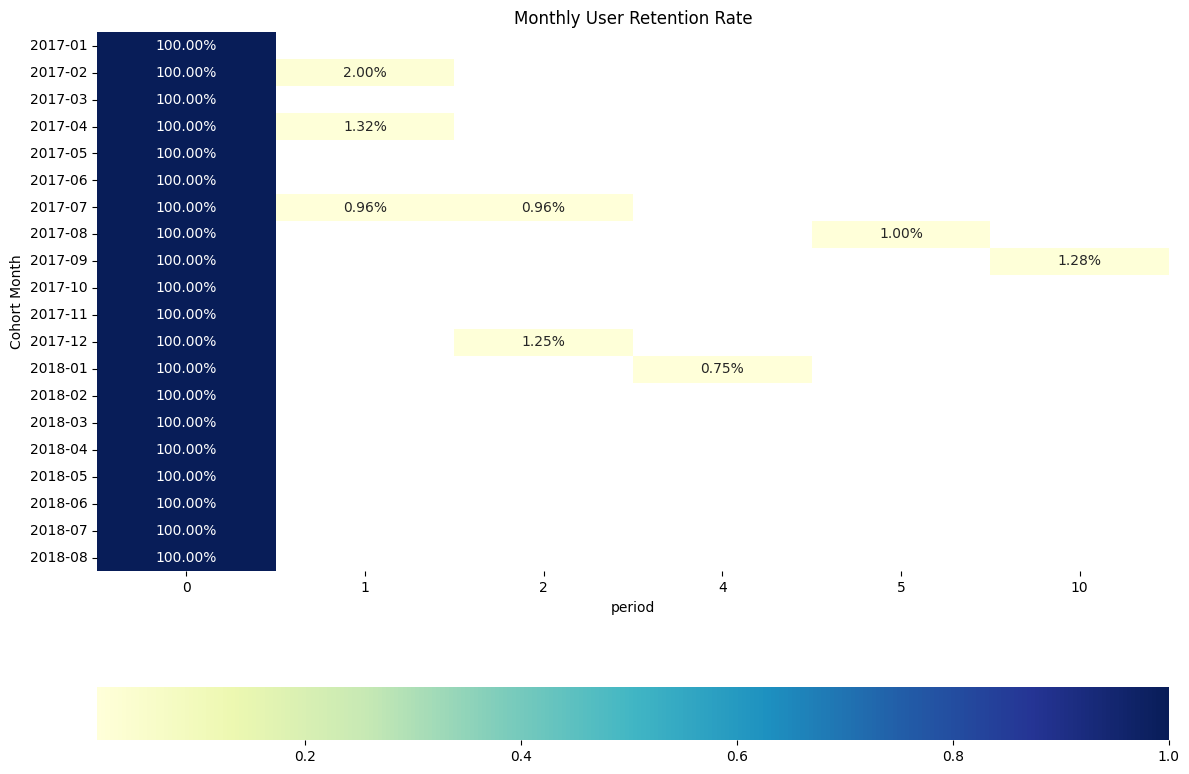

In [62]:
plt.figure(figsize=(12,8))
sns.heatmap(pivot_cohort,
            annot=True,
            fmt='.2%',
            cmap='YlGnBu',
            cbar_kws={'orientation':'horizontal'})
plt.tight_layout()
plt.xlabel('period')
plt.ylabel('Cohort Month')
plt.title('Monthly User Retention Rate')
plt.show()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2022 entries, 0 to 3664
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    2022 non-null   object        
 1   customer_unique_id             2022 non-null   object        
 2   customer_zip_code_prefix       2022 non-null   int64         
 3   customer_city                  2022 non-null   object        
 4   customer_state                 2022 non-null   object        
 5   order_id                       2022 non-null   object        
 6   order_status                   2022 non-null   object        
 7   order_purchase_timestamp       2022 non-null   datetime64[ns]
 8   order_approved_at              2022 non-null   datetime64[ns]
 9   order_delivered_carrier_date   2022 non-null   object        
 10  order_delivered_customer_date  2022 non-null   datetime64[ns]
 11  order_estimated_delive

In [64]:
df.to_csv('2. EDA.csv', index=False)